###  Project
                          
#    Doctor Consultation Fees Prediction
                            
##   Linear Regression 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df_train=pd.read_excel('C:/Users\Sande\Downloads\Doctor_fee_consultation\Final Participant Data Folder\Final_Train.xlsx')
df_test=pd.read_excel("C:/Users\Sande\Downloads\Doctor_fee_consultation\Final Participant Data Folder\Final_Test.xlsx")

In [3]:
df_train.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [4]:
df_test.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...


In [5]:
df_train.shape

(5961, 7)

In [6]:
df_test.shape

(1987, 6)

In [7]:
# finding the unique values in every categorical columns
print('Qualification: ',df_train['Qualification'].nunique())
print('Experience : ',df_train['Experience'].nunique())
print('Rating : ',df_train['Rating'].nunique())
print('Place : ',df_train['Place'].nunique())
print('Profile : ',df_train['Profile'].nunique())

Qualification:  1420
Experience :  64
Rating :  51
Place :  877
Profile :  6


### Data Pre-processing

In [8]:
# spiling the place into city and area
df_train['City'] = df_train['Place'].str.split(', ').str[-1]
df_train['Area'] = df_train['Place'].str.split(', ').str[0]


df_test['City'] = df_test['Place'].str.split(', ').str[-1]
df_test['Area'] = df_test['Place'].str.split(', ').str[0]

df_train.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,City,Area
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,Ernakulam,Kakkanad
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,Bangalore,Whitefield
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300,Bangalore,Mathikere - BEL
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,Bangalore,Bannerghatta Road
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,Chennai,Keelkattalai


In [9]:
count = df_train.groupby(['City']).count()
count.Qualification

City
Bangalore             1258
Chennai                855
Coimbatore             228
Delhi                 1185
Ernakulam              153
Hyderabad              951
Mumbai                1219
Thiruvananthapuram      86
e                        1
Name: Qualification, dtype: int64

In [10]:
val = df_train[df_train['City'] == 'e'].index
val

Int64Index([3980], dtype='int64')

In [11]:
# droping e from city columns
df_train = df_train.drop([3980])

In [12]:
# taking exprience as in number only 
df_train['Experience'] = df_train['Experience'].apply(lambda x : re.findall(r'^\d\d?', x)[0]).astype(int)

df_test['Experience'] = df_test['Experience'].apply(lambda x : re.findall(r'^\d\d?', x)[0]).astype(int)

In [13]:
df_train['Rating'].count

<bound method Series.count of 0       100%
1        98%
2        NaN
3        NaN
4       100%
        ... 
5956     98%
5957     NaN
5958     97%
5959     90%
5960    100%
Name: Rating, Length: 5960, dtype: object>

In [14]:
df_train['Rating'].value_counts()

100%    684
98%     290
99%     259
97%     241
96%     220
95%     178
94%     115
93%     109
92%      66
90%      66
91%      60
89%      42
88%      41
85%      27
82%      23
83%      21
86%      21
80%      19
77%      16
87%      14
84%      13
79%      13
81%      12
67%      12
76%       9
71%       9
73%       8
75%       8
74%       7
60%       7
78%       6
56%       5
68%       5
70%       4
69%       4
57%       3
72%       3
33%       2
62%       2
64%       2
55%       2
63%       2
45%       1
53%       1
36%       1
65%       1
48%       1
58%       1
40%       1
47%       1
7%        1
Name: Rating, dtype: int64

In [15]:
# removing % sign from ratings and replacing null values with mode
df_train['Rating'].fillna(df_train['Rating'].mode()[0],inplace = True)
df_train['Rating'] = df_train['Rating'].str[0:-1].astype(float)

df_test['Rating'].fillna(df_test['Rating'].mode()[0],inplace = True)
df_test['Rating'] = df_test['Rating'].str[0:-1].astype(float)

df_train.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,City,Area
0,"BHMS, MD - Homeopathy",24,100.0,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,Ernakulam,Kakkanad
1,"BAMS, MD - Ayurveda Medicine",12,98.0,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,Bangalore,Whitefield
2,"MBBS, MS - Otorhinolaryngology",9,100.0,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300,Bangalore,Mathikere - BEL
3,"BSc - Zoology, BAMS",12,100.0,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,Bangalore,Bannerghatta Road
4,BAMS,20,100.0,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,Chennai,Keelkattalai


In [16]:
df_train['Profile'].unique()

array(['Homeopath', 'Ayurveda', 'ENT Specialist', 'Dentist',
       'General Medicine', 'Dermatologists'], dtype=object)

In [17]:
# droping the unecessary columns
df_train.drop(['Miscellaneous_Info','Area','Place'],axis=1,inplace=True)   
df_test.drop(['Miscellaneous_Info','Area','Place'],axis=1,inplace=True)   


In [18]:
df_train.head()

,Qualification,Experience,Rating,Profile,Fees,City
0,"BHMS, MD - Homeopathy",24,100.0,Homeopath,100,Ernakulam
1,"BAMS, MD - Ayurveda Medicine",12,98.0,Ayurveda,350,Bangalore
2,"MBBS, MS - Otorhinolaryngology",9,100.0,ENT Specialist,300,Bangalore
3,"BSc - Zoology, BAMS",12,100.0,Ayurveda,250,Bangalore
4,BAMS,20,100.0,Ayurveda,250,Chennai


In [19]:
df_test.head()

,Qualification,Experience,Rating,Profile,City
0,MBBS,35,100.0,General Medicine,Mumbai
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31,100.0,ENT Specialist,Hyderabad
2,"MBBS, DDVL",40,70.0,Dermatologists,Chennai
3,BAMS,0,100.0,Ayurveda,Delhi
4,"BDS, MDS - Conservative Dentistry & Endodontics",16,100.0,Dentist,Bangalore


# EDA

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
df_train.head()

,Qualification,Experience,Rating,Profile,Fees,City
0,"BHMS, MD - Homeopathy",24,100.0,Homeopath,100,Ernakulam
1,"BAMS, MD - Ayurveda Medicine",12,98.0,Ayurveda,350,Bangalore
2,"MBBS, MS - Otorhinolaryngology",9,100.0,ENT Specialist,300,Bangalore
3,"BSc - Zoology, BAMS",12,100.0,Ayurveda,250,Bangalore
4,BAMS,20,100.0,Ayurveda,250,Chennai


<AxesSubplot:xlabel='Profile', ylabel='count'>

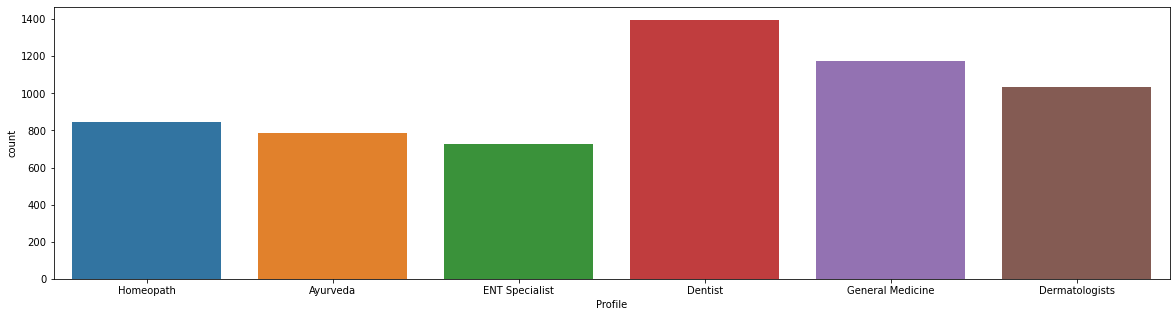

In [22]:
plt.figure(figsize=(20,5))
sns.countplot(x='Profile', data=df_train)


- Most of Doctors we have available are Dentists 
- After that General Medicine and Dermatologists are higher in Profile

<AxesSubplot:xlabel='Fees', ylabel='count'>

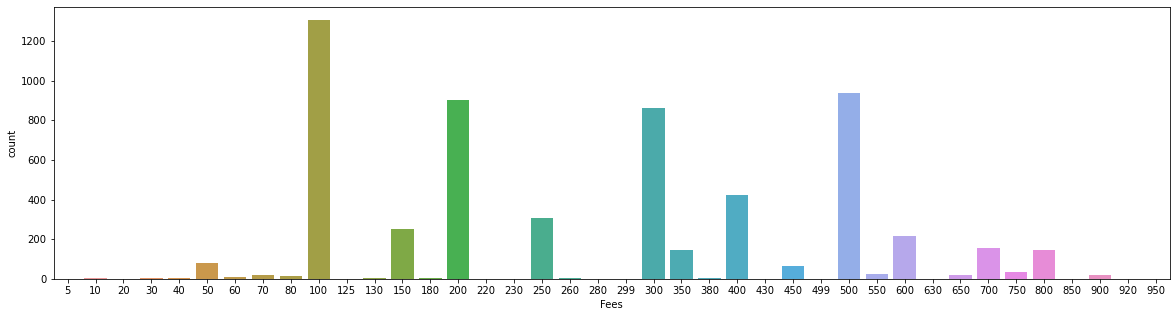

In [23]:
plt.figure(figsize=(20,5))
sns.countplot(x='Fees', data=df_train)


- Most of commos fees we see here- 100, 200, 300, 500
- most of Doctors are charging 100 rs

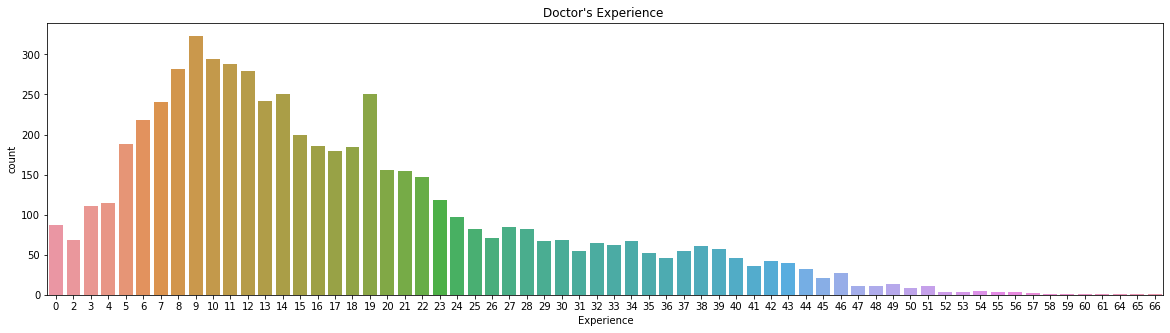

In [24]:
plt.figure(figsize=(20,5))
sns.countplot(x='Experience', data=df_train)
plt.title("Doctor's Experience ")
plt.xticks()
plt.show()

- Mostly Doctors we in Experience between 5 to 22 Years
- Very less no of Doctors we have more than 45 years of experience

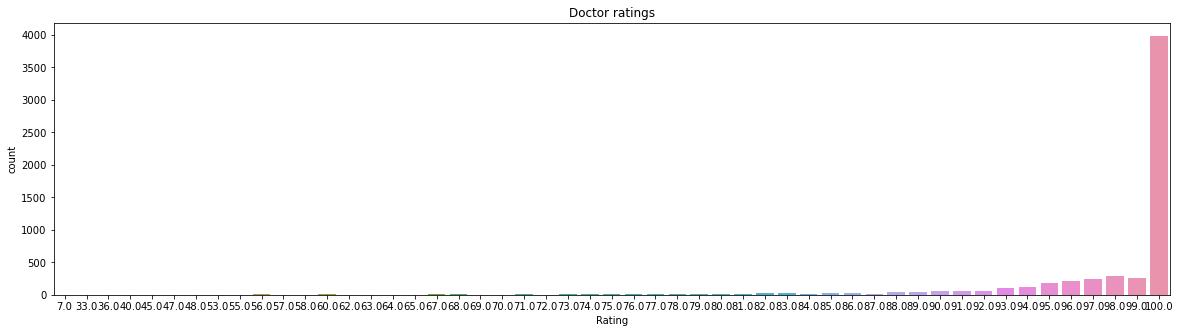

In [25]:
plt.figure(figsize=(20,5))
sns.countplot(x='Rating', data=df_train)
plt.title("Doctor ratings")
plt.show()

- After replacing null values with mode most of the values assign to 100% 
- means most of the doctors rating are 100%

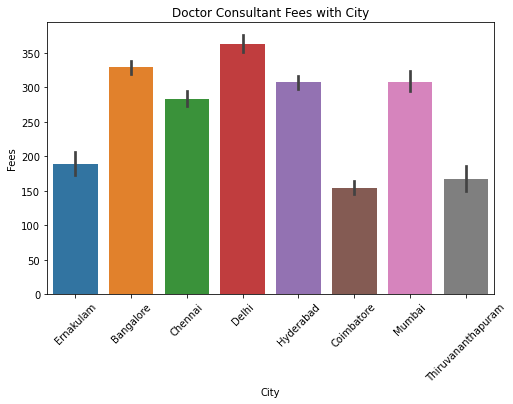

In [26]:
plt.figure(figsize=(8,5))
sns.barplot(x='City',y='Fees', data=df_train)
plt.title("Doctor Consultant Fees with City")
plt.xticks(rotation=45)
plt.show()

- There is Highest Doctor fee in Delhi City
- After that Banglore, Hyderabad, Mumbai and Chennai are the most expensive cities
- Emakulam, Coimbatore and Thiruvananthapuram are the most lower in fee

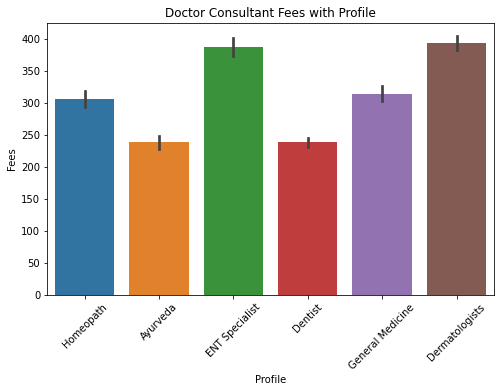

In [27]:
plt.figure(figsize=(8,5))
sns.barplot(x='Profile',y='Fees',data=df_train)
plt.title("Doctor Consultant Fees with Profile")
plt.xticks(rotation=45)
plt.show()

- We can see here Highest fee is paid to Dermatologists and ENT Specialist
- Homepath and General Medicine are in middle with fee
- Denists and Ayurveda are on lower side with fee

## Label Encoding

In [28]:
#Encoding Qualification,City and Profile Column into Numeric Values in df_train
import sklearn
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
list1=['City','Profile','Qualification']
for val in list1:
    df_train[val]=le.fit_transform(df_train[val].astype(str))

In [29]:
df_train.head()

,Qualification,Experience,Rating,Profile,Fees,City
0,401,24,100.0,5,100,4
1,73,12,98.0,0,350,0
2,1135,9,100.0,3,300,0
3,464,12,100.0,0,250,0
4,10,20,100.0,0,250,1


In [30]:
#Encoding Qualification,City and Profile Column into Numeric Values in df_test
import sklearn
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
list1=['City','Profile','Qualification']
for val in list1:
    df_test[val]=le.fit_transform(df_test[val].astype(str))

In [31]:
df_test.head()

,Qualification,Experience,Rating,Profile,City
0,241,35,100.0,4,6
1,340,31,100.0,3,5
2,258,40,70.0,2,1
3,6,0,100.0,0,3
4,79,16,100.0,1,0


### Correlation

<AxesSubplot:>

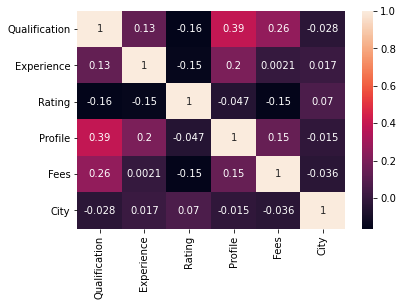

In [32]:
sns.heatmap(df_train.corr(),annot= True)

- Profile is positively correlated with Fees whereas Rating is negatively correlated.

## checking for skewness


Qualification    0.239447
Experience       0.991306
Rating          -4.701254
Profile          0.108488
Fees             0.751676
City             0.010106
dtype: float64

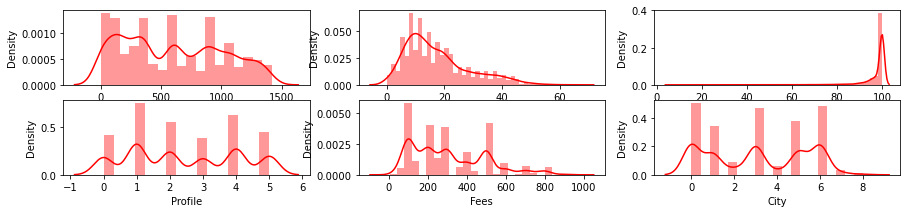

In [33]:
plt.figure(figsize=(15,8))
for i in enumerate(df_train):
    plt.subplot(5,3,i[0]+1)
    sns.distplot(df_train[i[1]],color='r')    

df_train.skew()

we can see here most of the columns are skewed 
##### will only deal with numercal columns 
- Rating

In [34]:
from sklearn.preprocessing import power_transform

df_train[['Rating']]=power_transform(df_train[['Rating']],method='yeo-johnson')

## Outliers Handling

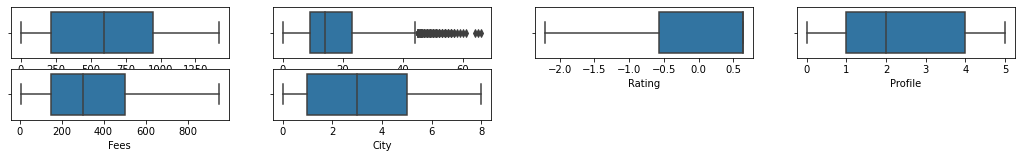

In [35]:
plt.figure(figsize=(18,10))
for o in enumerate(df_train):
    plt.subplot(9,4,o[0]+1)
    sns.boxplot(df_train[o[1]])

{'whiskers': [<matplotlib.lines.Line2D at 0x1bef387fbb0>,
 'caps': [<matplotlib.lines.Line2D at 0x1bef388d2b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1bef387f850>],
 'medians': [<matplotlib.lines.Line2D at 0x1bef388d970>],
 'fliers': [<matplotlib.lines.Line2D at 0x1bef388dcd0>],
 'means': []}

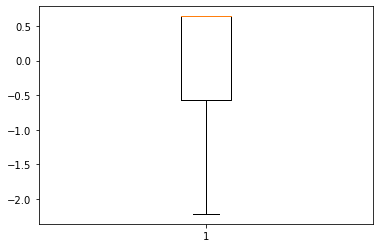

In [36]:
# checking for numerical column
plt.boxplot(df_train['Rating'])

- Only some of columns seems having outliers after skewness removed .

# outliers removal
### zscore

In [37]:
from scipy.stats import zscore

z=np.abs(zscore(df_train))

print(np.where(z>3))

(array([ 105,  110,  183,  275,  293,  325,  372,  901,  987, 1009, 1111,
       1314, 1631, 1860, 1981, 2023, 2062, 2165, 2202, 2252, 2262, 2281,
       2393, 2428, 2522, 2623, 2631, 2708, 3180, 3365, 3478, 3493, 3608,
       3942, 3960, 4039, 4166, 4211, 4256, 4343, 4580, 4729, 4762, 4774,
       4834, 5194, 5249, 5264, 5276, 5310, 5409, 5421, 5586, 5636, 5663,
       5719, 5806, 5941], dtype=int64), array([1, 1, 1, 4, 4, 1, 1, 1, 4, 1, 1, 4, 4, 1, 1, 1, 1, 4, 1, 4, 1, 1,
       4, 4, 4, 4, 1, 4, 1, 4, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 4, 4, 1, 1,
       4, 4, 4, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64))


In [38]:
df_1=df_train[(z<3).all(axis=1)]
print("with outliers::",df_train.shape)
print("After removing outliers::",df_1.shape)

with outliers:: (5960, 6)
After removing outliers:: (5902, 6)


- Zscore removing all rows from data

## IQR

In [39]:

from scipy import stats 
IQR = stats.iqr(df_train) 
IQR 

191.0

In [40]:
Q1 = df_train.quantile(0.25)
Q3 = df_train.quantile(0.75)
df_out = df_train[~((df_train < (Q1 - 1.5 * IQR)) |(df_train > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df_out.shape)

(5320, 6)


#### We can notice using IQR method for outliers removal there is huge data loss so considering ZSCORE METHOD 

In [41]:
df_train=df_1

# Dividing data into X and Y

In [42]:
x=df_train.drop(['Fees'],axis=1)
y=df_train['Fees']


In [43]:
print(x.shape)
print(y.shape)

(5902, 5)
(5902,)


#### SCALLING THE DATA

In [44]:
from sklearn.preprocessing import MinMaxScaler

sc=MinMaxScaler()
x=sc.fit_transform(x)

In [45]:
pd.DataFrame(x).describe()

,0,1,2,3,4
count,5902.000000,5902.000000,5902.000000,5902.000000,5902.000000
mean,0.419544,0.340932,0.775054,0.486513,0.384425
std,0.292143,0.215095,0.350252,0.331835,0.289222
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.154334,0.180000,0.574148,0.200000,0.125000
50%,0.420014,0.280000,1.000000,0.400000,0.375000
75%,0.664553,0.440000,1.000000,0.800000,0.625000
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [46]:
x.shape

(5902, 5)

 # MODEL BUILDING:

### Linear Regression

In [47]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score



#### CHECKING THE BEST RANDOM STATE FOR DATA SPLIT

In [71]:
from sklearn.linear_model import LinearRegression


LR=LinearRegression()

for i in range(0,300):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    LR.fit(x_train,y_train)
    LR_predict_train=LR.predict(x_train)
    LR_predict_test=LR.predict(x_test)
    print(f'At random state {i}, The training accuracy is: {r2_score(y_train,LR_predict_train)}')
    print(f'At random state {i}, The test accuracy is: {r2_score(y_test,LR_predict_test)}')
    print('\n')

At random state 0, The training accuracy is: 0.09586887432720548
At random state 0, The test accuracy is: 0.10878526870998917


At random state 1, The training accuracy is: 0.10205112093530455
At random state 1, The test accuracy is: 0.08667704687151256


At random state 2, The training accuracy is: 0.0941427482192222
At random state 2, The test accuracy is: 0.11660793311296747


At random state 3, The training accuracy is: 0.10404702323013504
At random state 3, The test accuracy is: 0.07591870807102918


At random state 4, The training accuracy is: 0.09925994139420258
At random state 4, The test accuracy is: 0.09724431786786936


At random state 5, The training accuracy is: 0.09950154394239408
At random state 5, The test accuracy is: 0.0965933493661324


At random state 6, The training accuracy is: 0.10147927606398899
At random state 6, The test accuracy is: 0.08806310909355652


At random state 7, The training accuracy is: 0.09928418599403477
At random state 7, The test accuracy is: 

random state=42 giving highest accuracy, choosing that as random state

#### SPLITTING THE DATA WITH RANDOM STATE =42

In [72]:
#splitting the data into 70% training and 20% testing
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [73]:
x_train.shape

(4721, 5)

In [74]:
x_test.shape

(1181, 5)

In [75]:
y_train.shape

(4721,)

In [76]:
y_test.shape

(1181,)

In [77]:
from sklearn.linear_model import LinearRegression


LR=LinearRegression()
LR.fit(x_train,y_train)
print(LR.score(x_train,y_train))
LR_predict=LR.predict(x_test)

0.09339810004619498


In [78]:
print('MSE:',mean_squared_error(LR_predict,y_test))
print('MAE:',mean_absolute_error(LR_predict,y_test))
print('r2_score:',r2_score(LR_predict,y_test))

MSE: 31026.669188987624
MAE: 143.52742165812893
r2_score: -7.998872938027448


### Ridge

In [79]:
from sklearn.linear_model import Ridge

R=Ridge()
R.fit(x_train,y_train)
print(R.score(x_train,y_train))
R_predict=R.predict(x_test)

0.09339765450156268


In [80]:
print('MSE:',mean_squared_error(R_predict,y_test))
print('MAE:',mean_absolute_error(R_predict,y_test))
print('r2_score:',r2_score(R_predict,y_test))

MSE: 31027.668146057982
MAE: 143.5394472969635
r2_score: -8.03361042735412


### SVR
#### SVR(kernel='linear')

In [81]:
from sklearn.svm import SVR

svr=SVR(kernel='linear')
svr.fit(x_train,y_train)
print(svr.score(x_train,y_train))
svr_predict=svr.predict(x_test)

0.049248647663526324


In [82]:
print('MSE:',mean_squared_error(svr_predict,y_test))
print('MAE:',mean_absolute_error(svr_predict,y_test))
print('r2_score:',r2_score(svr_predict,y_test))

MSE: 32474.254387961162
MAE: 141.55537829730002
r2_score: -11.772754090038715


#### SVR(kernel='poly')

In [83]:
svr_p=SVR(kernel='poly')
svr_p.fit(x_train,y_train)
print(svr_p.score(x_train,y_train))
svrpred_p=svr_p.predict(x_test)

0.06733948393212674


In [84]:
print('MSE:',mean_squared_error(svrpred_p,y_test))
print('MAE:',mean_absolute_error(svrpred_p,y_test))
print('r2_score:',r2_score(svrpred_p,y_test))

MSE: 32014.58594284669
MAE: 139.68191225107532
r2_score: -6.733363996881094


#### (kernel='rbf')

In [85]:
svr_r=SVR(kernel='rbf')
svr_r.fit(x_train,y_train)
print(svr_r.score(x_train,y_train))
svrpred_r=svr_r.predict(x_test)

0.061049858548075986


In [86]:
print('MSE:',mean_squared_error(svrpred_r,y_test))
print('MAE:',mean_absolute_error(svrpred_r,y_test))
print('r2_score:',r2_score(svrpred_r,y_test))


MSE: 32186.430796093773
MAE: 140.71552485877066
r2_score: -14.045338886190915


### RandomForestRegressor

In [87]:
from sklearn.ensemble import RandomForestRegressor

RF=RandomForestRegressor()
RF.fit(x_train,y_train)
print(RF.score(x_train,y_train))
RF_PRED=RF.predict(x_test)

0.7990879543774708


In [88]:
print('MSE:',mean_squared_error(RF_PRED,y_test))
print('MAE:',mean_absolute_error(RF_PRED,y_test))
print('r2_score:',r2_score(RF_PRED,y_test))

MSE: 33692.61436976887
MAE: 140.94794849060222
r2_score: -1.605283119470018


### DecisionTreeRegressor

In [89]:
from sklearn.tree import DecisionTreeRegressor

DTR=DecisionTreeRegressor()
DTR.fit(x_train,y_train)
print(DTR.score(x_train,y_train))
DTR_PRED=DTR.predict(x_test)

0.8999406046615361


In [90]:
print('MSE:',mean_squared_error(DTR_PRED,y_test))
print('MAE:',mean_absolute_error(DTR_PRED,y_test))
print('r2_score:',r2_score(DTR_PRED,y_test))

MSE: 53466.458710622275
MAE: 168.80613012916146
r2_score: -0.585053188667291


### GradientBoostingRegressor

In [91]:
from sklearn.ensemble import GradientBoostingRegressor

GBR=GradientBoostingRegressor()
GBR.fit(x_train,y_train)
print(GBR.score(x_train,y_train))
GBR_PRED=GBR.predict(x_test)

0.25355584244036133


In [92]:
print('MSE:',mean_squared_error(GBR_PRED,y_test))
print('MAE:',mean_absolute_error(GBR_PRED,y_test))
print('r2_score:',r2_score(GBR_PRED,y_test))

MSE: 28294.172021677663
MAE: 132.67018447930843
r2_score: -3.1400104621957743


### cross validation


In [93]:
from sklearn.model_selection import cross_val_score

np.random.seed(10)
def rmse_cv(model, x,y):
    rmse =- (cross_val_score(model, x,y, scoring='neg_mean_squared_error', cv=10))
    return(rmse)


models = [LinearRegression(),
             Ridge(),
             SVR(kernel='linear'),
             SVR(kernel='poly'),
             SVR(kernel='rbf'),
             RandomForestRegressor(),
             DecisionTreeRegressor(),  
             GradientBoostingRegressor(),]
            


names = ['LR','R','svr','svr_p','svr_r','RF','DTR','GBR']

for model,name in zip(models,names):
    score = rmse_cv(model,x,y)
    print("{}    : {:.6f}, {:4f}".format(name,score.mean(),score.std()))

LR    : 31981.597920, 1628.942975
R    : 31981.388817, 1628.103612
svr    : 33334.778807, 1902.666123
svr_p    : 33060.198511, 1794.916614
svr_r    : 32940.063891, 1878.176029
RF    : 33107.965890, 1771.496203
DTR    : 53685.099038, 3281.703071
GBR    : 28523.910224, 1314.934187


#### -Accourding to all metrics score selecting the DecisionTreeRegressor for GridSeachCV

## HYPER PARAMETER TUNING:


## GridSearchCV

#### DecisionTreeRegressor

In [94]:
from sklearn.model_selection import GridSearchCV

In [95]:
dtr=DecisionTreeRegressor()
param={
     'criterion':["mse", "friedman_mse", "mae"],
    'random_state':[42],
    'splitter':['best','random'],
   'max_features' : ['auto',"sqrt", "log2",],
}

In [96]:
dtr_grid=GridSearchCV(DecisionTreeRegressor(),param,cv=10,scoring='accuracy',n_jobs=-1,verbose=2)

In [97]:
dtr_grid.fit(x_train,y_train)
dtr_grid_pred=dtr_grid.best_estimator_.predict(x_test)


Fitting 10 folds for each of 18 candidates, totalling 180 fits


In [98]:
dtr_grid.best_params_

{'criterion': 'mse',
 'max_features': 'auto',
 'random_state': 42,
 'splitter': 'best'}

#### model training with best parameters

In [99]:
best_param={'criterion': ['mse'],
 'max_features': ['sqrt'],
 'random_state': [42],
 'splitter': ['random']}

In [100]:
best_dtr_grid=GridSearchCV(DecisionTreeRegressor(),best_param,cv=10,scoring='accuracy',n_jobs=-1,verbose=2)

In [101]:
best_dtr_grid.fit(x_train,y_train)
best_dtr_pred=best_dtr_grid.best_estimator_.predict(x_test)

Fitting 10 folds for each of 1 candidates, totalling 10 fits


In [102]:
print('MSE:',mean_squared_error(best_dtr_pred,y_test))
print('MAE:',mean_absolute_error(best_dtr_pred,y_test))
print('r2_score:',r2_score(best_dtr_pred,y_test))

MSE: 50873.73733898019
MAE: 161.1183352821795
r2_score: -0.6848250021445783


<AxesSubplot:xlabel='Fees', ylabel='Density'>

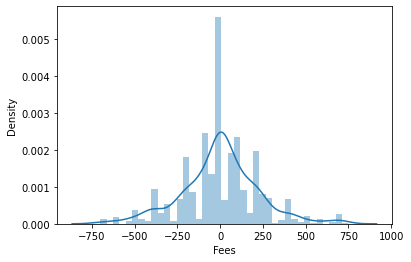

In [103]:
sns.distplot(best_dtr_pred-y_test)

## saving the model

In [104]:

import joblib

In [105]:
joblib.dump(best_dtr_grid.best_estimator_,'Doctor Consultation Fees Project.obj')

['Doctor Consultation Fees Project.obj']

In [106]:
model=joblib.load('Doctor Consultation Fees Project.obj')

## Predicting df_test data on model

In [110]:
n=model.predict(df_test)
n

array([100., 100., 100., ..., 100., 100., 100.])

In [111]:
pd.DataFrame(n).value_counts()

100.0    1879
400.0      81
450.0      26
50.0        1
dtype: int64